Ad:Cudi
Soyad:Şami
Okul Numarası:2012721308
GitHub Repo Bağlantısı:https://github.com/cudi33/CNN_siniflandirma-

### Google Drive Bağlantısı

Bu adımda veri setinin Google Drive üzerinden okunabilmesi için Drive ortamı projeye bağlanmıştır.
Böylece eğitim sırasında görsellere doğrudan erişim sağlanmıştır.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### Gerekli Kütüphanelerin Yüklenmesi

Bu bölümde derin öğrenme modeli oluşturmak ve eğitmek için gerekli olan TensorFlow, Keras ve
görselleştirme için Matplotlib kütüphaneleri projeye dahil edilmiştir.


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt


### Veri Seti Yolu ve Ön İşleme Ayarları

Bu aşamada veri setinin bulunduğu klasör yolu tanımlanmış, görseller 128x128 boyutuna
getirilmiş ve eğitim sırasında kullanılacak batch size değeri belirlenmiştir.

Ayrıca ImageDataGenerator kullanılarak:
- Piksel değerleri 0–1 aralığına normalize edilmiştir
- Veri seti %80 eğitim, %20 doğrulama olarak ayrılmıştır


### Eğitim ve Doğrulama Veri Üreticileri

Bu adımda ImageDataGenerator kullanılarak:
- Eğitim (training) verileri
- Doğrulama (validation) verileri

ayrı ayrı oluşturulmuştur. Görseller otomatik olarak sınıf klasörlerine göre etiketlenmiştir.


In [ ]:
dataset_path = "/content/drive/MyDrive/dataset"

img_size = (128, 128)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 173 images belonging to 3 classes.
Found 42 images belonging to 3 classes.


### Model 2 – Temel CNN Mimarisi

Bu model sıfırdan oluşturulmuş bir Convolutional Neural Network (CNN) mimarisidir.

Model yapısı:
- 3 adet Conv2D + MaxPooling katmanı
- Özellik çıkarımı sonrası Flatten katmanı
- 1 adet Dense (tam bağlantılı) katman
- Aşırı öğrenmeyi önlemek için Dropout katmanı
- 3 sınıflı sınıflandırma için Softmax çıkış katmanı

Bu mimari CIFAR-10 benzeri temel CNN yaklaşımına dayanmaktadır.


In [ ]:
model2 = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Modelin Derlenmesi

Model, çok sınıflı sınıflandırma problemi olduğu için:
- Optimizer: Adam
- Kayıp fonksiyonu: categorical_crossentropy
- Performans metriği: accuracy

şeklinde derlenmiştir.


In [ ]:
model2.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


### Modelin Eğitilmesi

Model, eğitim verileri üzerinde 15 epoch boyunca eğitilmiştir.
Eğitim sırasında doğrulama verileri kullanılarak modelin genelleme başarısı izlenmiştir.


In [ ]:
history2 = model2.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 94s 15s/step - accuracy: 0.2940 - loss: 1.2664 - val_accuracy: 0.2619 - val_loss: 1.0994
Epoch 2/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.2911 - loss: 1.1099 - val_accuracy: 0.4048 - val_loss: 1.0911
Epoch 3/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.3961 - loss: 1.0901 - val_accuracy: 0.4048 - val_loss: 1.0846
Epoch 4/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.3591 - loss: 1.1054 - val_accuracy: 0.3333 - val_loss: 1.0870
Epoch 5/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.4154 - loss: 1.0813 - val_accuracy: 0.5714 - val_loss: 1.0534
Epoch 6/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.4642 - loss: 1.0509 - val_accuracy: 0.4762 - val_loss: 0.9914
Epoch 7/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.5951 - loss: 0.9766 - val_accuracy: 0.6429 - val_loss: 0.9084
Epoch 8/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.5982 - loss: 0.9181 - val_accuracy: 0.7381 - val_loss: 0.6970
Epoch 9

### Eğitim Sonuçlarının Görselleştirilmesi

Bu aşamada modelin:
- Eğitim ve doğrulama doğruluk (accuracy)
- Eğitim ve doğrulama kayıp (loss)

değerleri grafikler ile görselleştirilmiştir.
Grafikler, modelin öğrenme sürecini ve aşırı öğrenme durumunu analiz etmek için kullanılmıştır.


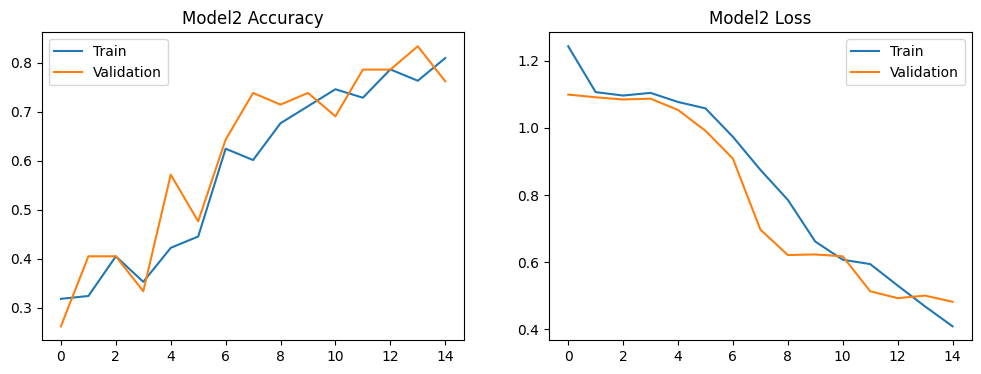

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model2 Accuracy')
plt.legend(['Train', 'Validation'])

plt.subplot(1,2,2)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model2 Loss')
plt.legend(['Train', 'Validation'])

plt.show()


### Model 2 Genel Değerlendirme

Model 2, sıfırdan oluşturulmuş temel bir CNN mimarisi olmasına rağmen
makul bir doğruluk oranına ulaşmıştır.

Ancak:
- Transfer Learning kullanılan Model 1'e kıyasla daha yavaş öğrenmiştir
- Daha fazla veri ve hiperparametre optimizasyonu ile geliştirilebilir

Bu model, Model 3 için yapılacak iyileştirmeler adına bir temel oluşturmuştur.
